In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2 

import keras
from keras.utils import to_categorical
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 100

data_path = "leapgestrecog/leapGestRecog"

In [3]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 5, ..., 3, 4, 3],
        [5, 6, 5, ..., 3, 3, 4],
        [4, 5, 6, ..., 4, 4, 3],
        ...,
        [4, 4, 5, ..., 4, 5, 6],
        [5, 6, 7, ..., 4, 5, 5],
        [4, 4, 5, ..., 5, 4, 7]], dtype=uint8),
 0]

In [4]:
import random
random.shuffle(image_data)

In [5]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

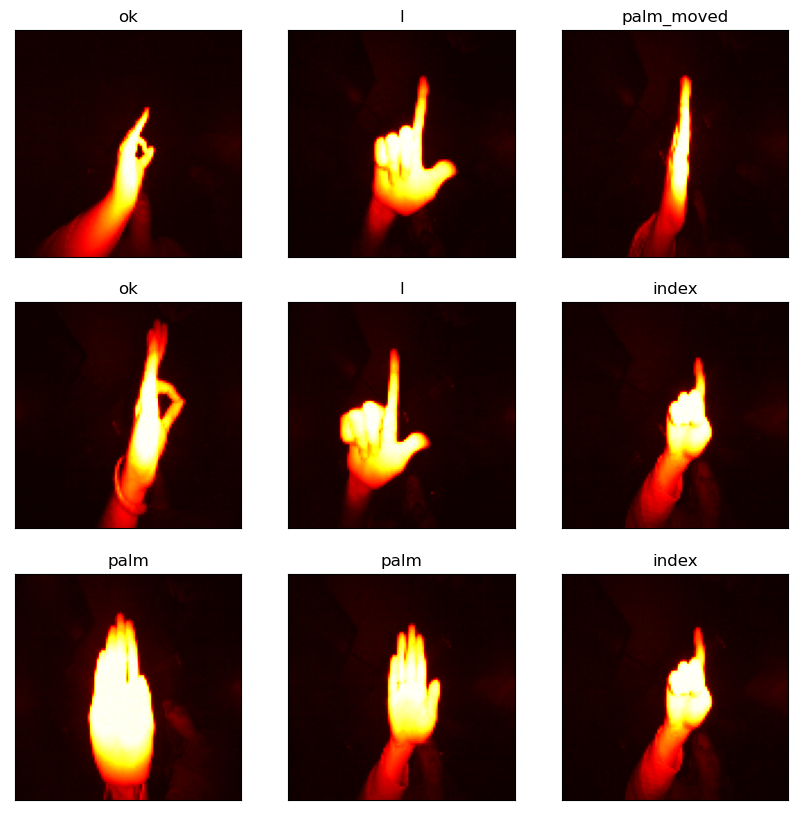

In [6]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [7]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 100, 100)

In [8]:
label = to_categorical(label, num_classes=10).astype('int8')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [9]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [11]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

C:\Users\maina\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.fit(X_train, y_train, epochs = 10, batch_size=42, validation_data=(X_test, y_test))

Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 142s 419ms/step - accuracy: 0.7256 - loss: 0.8290 - val_accuracy: 0.9985 - val_loss: 0.0094
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 163s 486ms/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.9985 - val_loss: 0.0044
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 139s 416ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 8.1618e-04
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 178s 531ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0019
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 147s 434ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 0.9998 - val_loss: 6.9444e-04
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 141s 419ms/step - accuracy: 0.9999 - loss: 1.8791e-04 - val_accuracy: 0.9997 - val_loss: 6.0382e-04
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 143s 428ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9998 - val_loss: 5.6735e-04
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 138s 413ms/step 

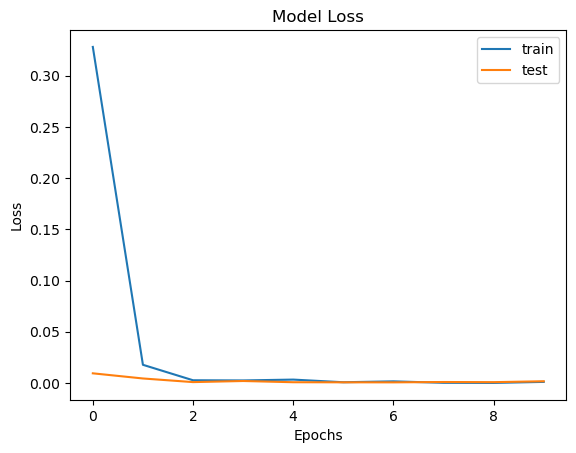

In [13]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

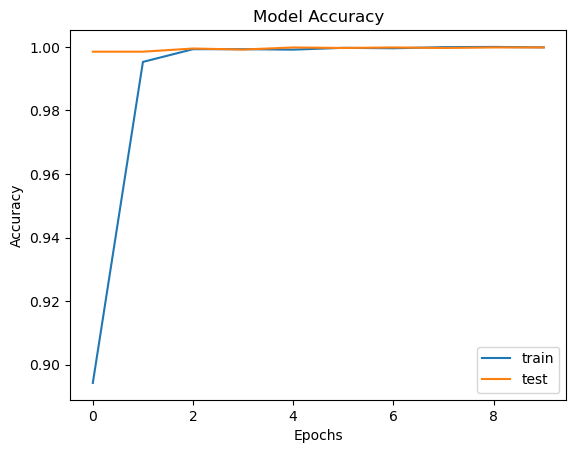

In [14]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9997 - loss: 0.0025
Test accuracy: 99.98%


188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step


[]

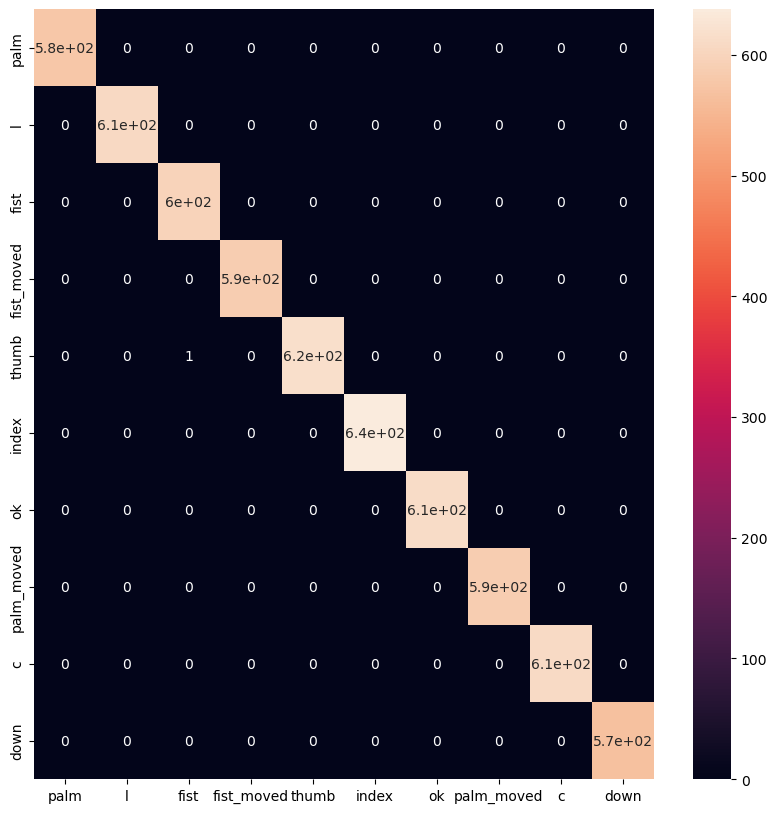

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

In [17]:
# Sanity Check Test
assert X_test.shape[0] == y_test.shape[0], "Mismatch in number of test samples and labels"
print(f"Sanity Check: Passed. Test samples: {X_test.shape[0]}, Labels: {y_test.shape[0]}")

# Accuracy Test
threshold_accuracy = 0.5
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
assert accuracy >= threshold_accuracy, f"Accuracy is below threshold! ({accuracy:.2f})"
print(f"Accuracy Test: Passed. Model Accuracy: {accuracy:.2f}")

# Edge Case Test
import numpy as np
edge_case_input = np.zeros((1, *X_test.shape[1:]))
prediction = model.predict(edge_case_input)
assert prediction.shape == (1, len(CATEGORIES)), f"Unexpected prediction shape! ({prediction.shape})"
print("Edge Case Test: Passed. All-zero input handled correctly.")

Sanity Check: Passed. Test samples: 6000, Labels: 6000
Accuracy Test: Passed. Model Accuracy: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Edge Case Test: Passed. All-zero input handled correctly.
